Dataset Overview:
        ID  Gender Ever_Married  Age Graduated     Profession  Work_Experience  \
0  462809    Male           No   22        No     Healthcare              1.0   
1  462643  Female          Yes   38       Yes       Engineer              NaN   
2  466315  Female          Yes   67       Yes       Engineer              1.0   
3  461735    Male          Yes   67       Yes         Lawyer              0.0   
4  462669  Female          Yes   40       Yes  Entertainment              NaN   

  Spending_Score  Family_Size  
0            Low          4.0  
1        Average          3.0  
2            Low          1.0  
3           High          2.0  
4           High          6.0  


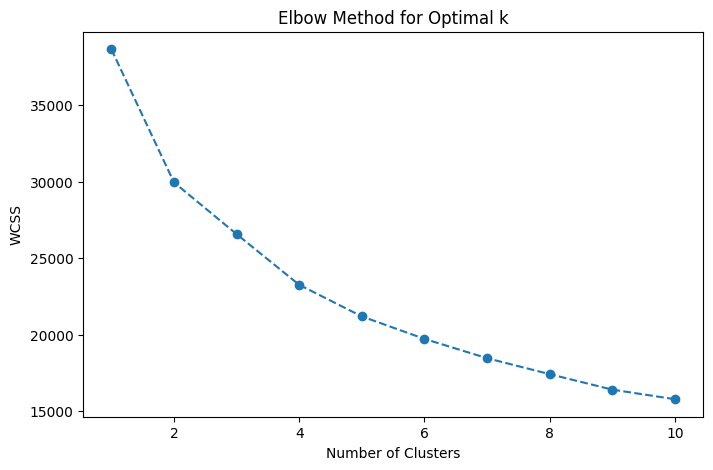

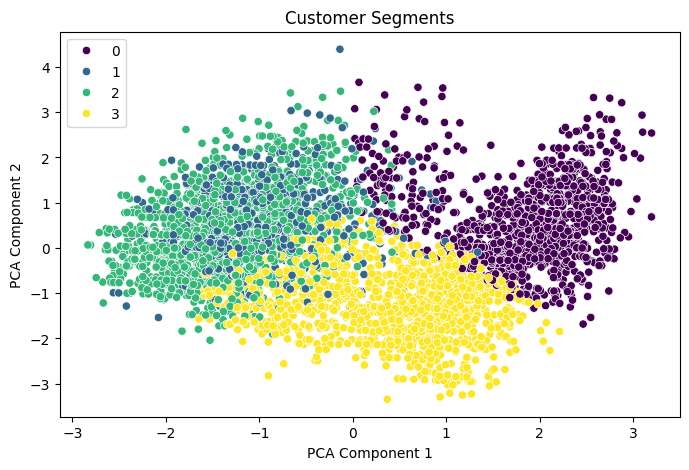

Cluster distribution:
 Cluster
2    1506
3    1398
0    1251
1     677
Name: count, dtype: int64


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Load dataset
file_path = "C:/Users/kaviy/OneDrive/Desktop/analytics/TapToBuy.csv"
df = pd.read_csv(file_path)

# Display basic info
print("Dataset Overview:\n", df.head())

# Handle missing values
imputer = SimpleImputer(strategy="most_frequent")
df[['Ever_Married', 'Graduated', 'Profession']] = imputer.fit_transform(df[['Ever_Married', 'Graduated', 'Profession']])
df[['Work_Experience', 'Family_Size']] = df[['Work_Experience', 'Family_Size']].fillna(df[['Work_Experience', 'Family_Size']].median())

# Encode categorical variables
encoder = LabelEncoder()
for col in ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score']:
    df[col] = encoder.fit_transform(df[col])

# Feature scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop(columns=['ID']))

# Finding optimal clusters using Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal k')
plt.show()

# Applying K-Means with optimal clusters (let's assume k=4 based on Elbow Method)
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(scaled_features)

# Reduce dimensions for visualization
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_features)
df['PCA1'] = reduced_data[:, 0]
df['PCA2'] = reduced_data[:, 1]

# Visualizing the clusters
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['Cluster'], palette='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Customer Segments')
plt.legend()
plt.show()

# Display cluster counts
print("Cluster distribution:\n", df['Cluster'].value_counts())

# Save clustered data
df.to_csv("C:/Users/kaviy/OneDrive/Desktop/analytics/TapToBuy.csv", index=False)
